In [1]:
import os
import random
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("distance-estimator/data/predictions.csv")
df.shape

(4088, 9)

In [3]:
def feet(m):
    return 3.28084*m

def m(ft):
    return 0.3048*ft

def kmh(mph):
    return 1.60934*mph

def mph(kmh):
    return 0.621371*kmh

def brake_distance(t=1.5, v=30, g=0, f=0.7):
    """
    t: reaction time in seconds
    v: speed of car in km/h
    g: grade of road in %
    f: friction coeff (0.7 on dry, 0.3 on wet)
    
    returns:
    brake distance in m
    """
    s = (0.278 * t * v) + v**2 / (254 * (f + g))
    return s

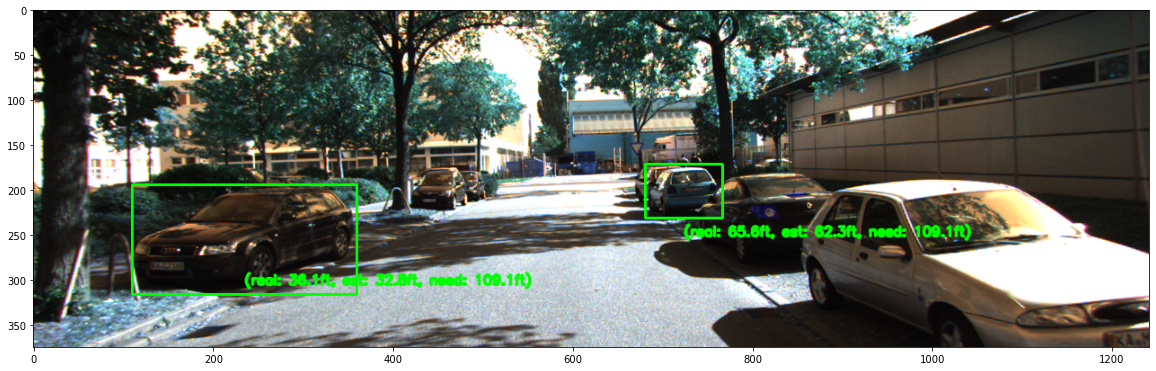

In [8]:
speed_in_mph = 30
idx = random.randint(0, df.shape[0])
filename = df.iloc[idx]['filename']

if os.path.exists(os.path.join("original_data/train_annots/", filename)):
    fp = os.path.join("original_data/train_images", filename.replace('.txt', '.png'))
    im = cv2.imread(fp)
else:
    raise Exception

for i, row in df.loc[df['filename'] == filename].iterrows():
    # draw bounding box
    x1, y1, x2, y2 = row[['xmin', 'ymin', 'xmax', 'ymax']]
    cv2.rectangle(im, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # add prediction label
    brake_dist = brake_distance(v=kmh(speed_in_mph))
    string = "(real: {:.1f}ft, est: {:.1f}ft, need: {:.1f}ft)".format(feet(row['zloc']), feet(row['zloc_pred']), feet(brake_dist))
    cv2.putText(im, string, (int((x1+x2)/2), int((y1+y2)/2)+50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    
fig, ax = plt.subplots(figsize=(20, 12))
ax.imshow(im)
fig.show()